In [9]:
import json, sys
import numpy as np
import matplotlib.pyplot as plt
import astropy.table as table
from scipy.io.idl import readsav
import scipy.signal as signal

try:
    import snelib19odp
except ImportError:
    sys.path.append('../lib')
import snelib19odp.extinction as extinction


def load_json_specs(fname):
    with open(fname, 'r') as f:
        data = json.load(f)
    sne = data[list(data.keys())[0]]
    specs = sne['spectra']
    #print(specs[1])
    ret_specs = []
    for spec in specs:
        if not 'time' in spec:
            continue
        t = spec['time']
        wave = np.array([float(x[0]) for x in spec['data']])
        flux = np.array([float(x[1]) for x in spec['data']])
        ret_specs.append({'time': float(t), 'wave': wave, 'flux': flux})
    return sorted(ret_specs, key=lambda x: x['time'])

In [3]:
# our spectrum 
tgt_spec1 = table.Table.read('../products/specs/fluxcal/ZTF19abqwtfu_20190821_P60_v1.ascii', format='ascii')
tgt_spec2 = table.Table.read('../products/specs/fluxcal/ZTF19abqwtfu_20190823_NTT_v1.ascii', format='ascii')
tgt_spec3 = table.Table.read('../products/specs/fluxcal/ZTF19abqwtfu_20190824_P60_v1.ascii', format='ascii')
tgt_spec4 = table.Table.read('../products/specs/fluxcal/ZTF19abqwtfu_20190827_P200_v1.ascii', format='ascii')
tgt_spec5 = table.Table.read('../products/specs/fluxcal/ZTF19abqwtfu_20190830_NOT_v1.ascii', format='ascii')
tgt_spec6 = table.Table.read('../products/specs/fluxcal/ZTF19abqwtfu_20190910_P60_v1.ascii', format='ascii')
tgt_spec7 = table.Table.read('../products/specs/fluxcal/ZTF19abqwtfu_20191003_NOT_v1.ascii', format='ascii')

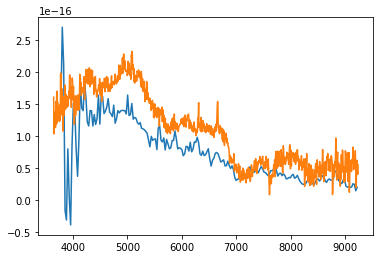

In [4]:
plt.plot(tgt_spec1['wavelength'], tgt_spec1['flux'])
plt.plot(tgt_spec2['wavelength'], tgt_spec2['flux'])


In [5]:
# load SN2008D
sn2008d_specs = load_json_specs('../data/comparison/SN2008D.json')
sn1998bw = load_json_specs('../data/comparison/SN1998bw.json')
ptf13bvn = load_json_specs('../data/comparison/iPTF13bvn.json')
#print(sn2008d_specs[0])

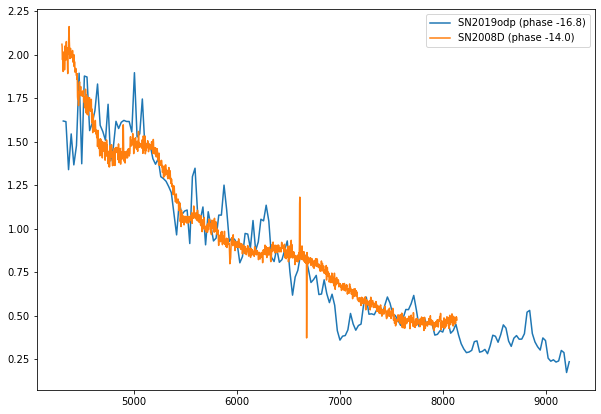

In [30]:
def plotr(wave, flux, label, fudge=1.0, alpha=1.0):
    wave_idx = np.logical_and(wave > 5000, wave < 7000)
    mean_flux = np.nanmean(flux[wave_idx])
    plot_idx = wave > 4300
    plt.plot(wave[plot_idx], (flux/mean_flux*fudge)[plot_idx], label=label, alpha=alpha)

plt.figure(figsize=(10,7))
idx = tgt_spec1['wavelength'] > 4000
plotr(tgt_spec1['wavelength'][idx], tgt_spec1['flux'][idx], label='SN2019odp (phase -16.8)')
idx = 9
phase = sn2008d_specs[idx]['time'] - 54492
plotr(sn2008d_specs[idx]['wave'], extinction.spec_extinction_correct(sn2008d_specs[idx]['wave'], sn2008d_specs[idx]['flux'], 0.6), label='SN2008D (phase %.1f)' % phase, fudge=1.0)
idx = 1
phase = sn1998bw[idx]['time'] - 50946
#plotr(sn1998bw[idx]['wave'], sn1998bw[idx]['flux'], label='SN1998bw (phase %.1f)' % phase, fudge=1.0)

plt.legend()

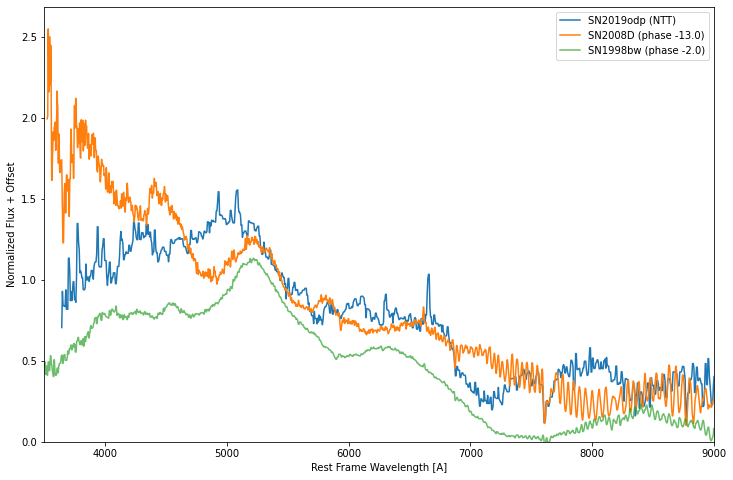

In [33]:
def plotr(wave, flux, label, fudge=1.0, alpha=1.0, smooth=3, offset=0):
    wave_idx = np.logical_and(wave > 4000, wave < 7000)
    mean_flux = np.nanmean(flux[wave_idx])
    smooth_flux = signal.medfilt(flux, smooth)
    plt.plot(wave, smooth_flux/mean_flux*fudge+offset, label=label, alpha=alpha)

plt.figure(figsize=(12,8))
plotr(tgt_spec2['wavelength'], tgt_spec2['flux'], label='SN2019odp (NTT)')
idx = 11
phase = sn2008d_specs[idx]['time'] - 54492
#plotr(sn2008d_specs[idx]['wave'], sn2008d_specs[idx]['flux'], offset=0.25, label='SN2008D (phase %.1f)' % phase, fudge=1.3, alpha=0.7)
plotr(sn2008d_specs[idx]['wave'], extinction.spec_extinction_correct(sn2008d_specs[idx]['wave'], sn2008d_specs[idx]['flux'], 0.6), label='SN2008D (phase %.1f)' % phase, fudge=1.0)
idx = 6
phase = sn1998bw[idx]['time'] - 50946
plotr(sn1998bw[idx]['wave'], sn1998bw[idx]['flux'], offset=-0.3, label='SN1998bw (phase %.1f)' % phase, fudge=1.0, alpha=0.7)
idx = 0
phase = ptf13bvn[idx]['time'] - 56475
#plotr(ptf13bvn[idx]['wave'], ptf13bvn[idx]['flux'], label='PTF13bvn (phase %.1f)' % phase, fudge=1.0, alpha=0.4)


plt.legend()
#plt.axvline(4804)
#plt.axvline(6436)
plt.xlim((3500,9000))
plt.ylim((0))
plt.xlabel('Rest Frame Wavelength [A]')
plt.ylabel('Normalized Flux + Offset')
plt.savefig('2021-04-20-NTT-2008D-1998bw-comparison.png')

In [186]:
1

1

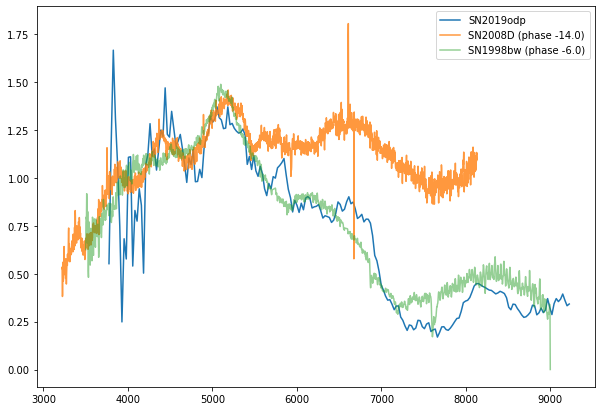

In [207]:
def plotr(wave, flux, label, fudge=1.0, alpha=1.0):
    wave_idx = np.logical_and(wave > 4000, wave < 7000)
    mean_flux = np.nanmean(flux[wave_idx])
    plt.plot(wave, flux/mean_flux*fudge, label=label, alpha=alpha)

plt.figure(figsize=(10,7))
plotr(tgt_spec3['wavelength'], tgt_spec3['flux'], label='SN2019odp')
idx = 9
phase = sn2008d_specs[idx]['time'] - 54492
plotr(sn2008d_specs[idx]['wave'], sn2008d_specs[idx]['flux'], label='SN2008D (phase %.1f)' % phase, fudge=1.2, alpha=0.8)
idx = 3
phase = sn1998bw[idx]['time'] - 50946
plotr(sn1998bw[idx]['wave'], sn1998bw[idx]['flux'], label='SN1998bw (phase %.1f)' % phase, fudge=1.0, alpha=0.5)

plt.legend()

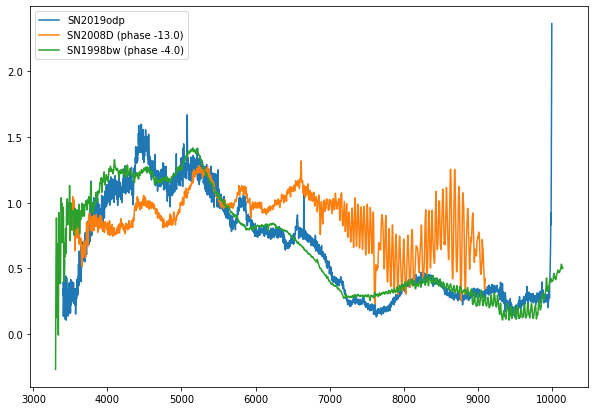

In [155]:
def plotr(wave, flux, label, fudge=1.0):
    wave_idx = np.logical_and(wave > 4000, wave < 7000)
    mean_flux = np.nanmean(flux[wave_idx])
    plt.plot(wave, flux/mean_flux*fudge, label=label)

plt.figure(figsize=(10,7))
plotr(tgt_spec4['wavelength'], tgt_spec4['flux'], label='SN2019odp')
idx = 11
phase = sn2008d_specs[idx]['time'] - 54492
plotr(sn2008d_specs[idx]['wave'], sn2008d_specs[idx]['flux'], label='SN2008D (phase %.1f)' % phase, fudge=1.0)
idx = 5
phase = sn1998bw[idx]['time'] - 50946
plotr(sn1998bw[idx]['wave'], sn1998bw[idx]['flux'], label='SN1998bw (phase %.1f)' % phase, fudge=1.0)

plt.legend()

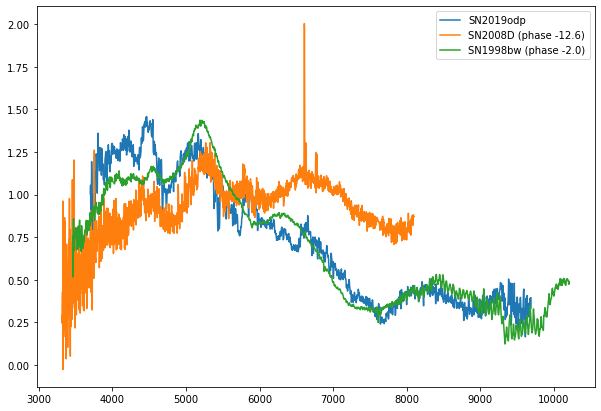

In [160]:
def plotr(wave, flux, label, fudge=1.0):
    wave_idx = np.logical_and(wave > 4000, wave < 7000)
    mean_flux = np.nanmean(flux[wave_idx])
    plt.plot(wave, flux/mean_flux*fudge, label=label)

plt.figure(figsize=(10,7))
plotr(tgt_spec5['wavelength'], tgt_spec5['flux'], label='SN2019odp')
idx = 13
phase = sn2008d_specs[idx]['time'] - 54492
plotr(sn2008d_specs[idx]['wave'], sn2008d_specs[idx]['flux'], label='SN2008D (phase %.1f)' % phase, fudge=1.0)
idx = 6
phase = sn1998bw[idx]['time'] - 50946
plotr(sn1998bw[idx]['wave'], sn1998bw[idx]['flux'], label='SN1998bw (phase %.1f)' % phase, fudge=1.0)

plt.legend()

(0.0, 1.8)

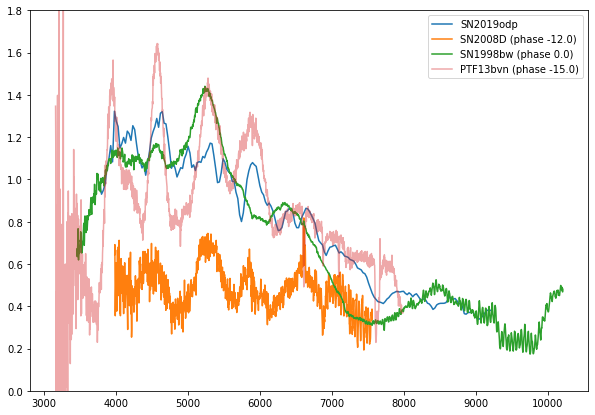

In [193]:
def plotr(wave, flux, label, fudge=1.0, alpha=1.0,offset=0.0):
    wave_idx = np.logical_and(wave > 4000, wave < 7000)
    mean_flux = np.nanmean(flux[wave_idx])
    plt.plot(wave, flux/mean_flux*fudge+offset, label=label, alpha=alpha)

plt.figure(figsize=(10,7))
plotr(tgt_spec6['wavelength'], tgt_spec6['flux'], label='SN2019odp')
idx = 14
phase = sn2008d_specs[idx]['time'] - 54492
plotr(sn2008d_specs[idx]['wave'], sn2008d_specs[idx]['flux'], label='SN2008D (phase %.1f)' % phase, fudge=1.0, offset=-0.5)
idx = 7
phase = sn1998bw[idx]['time'] - 50946
plotr(sn1998bw[idx]['wave'], sn1998bw[idx]['flux'], label='SN1998bw (phase %.1f)' % phase, fudge=1.0)
idx = 0
phase = ptf13bvn[idx]['time'] - 56475
plotr(ptf13bvn[idx]['wave'], ptf13bvn[idx]['flux'], label='PTF13bvn (phase %.1f)' % phase, fudge=1.0, alpha=0.4)


plt.legend()
plt.ylim((0,1.8))

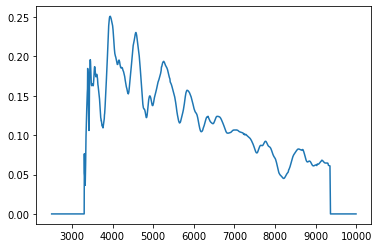

In [103]:
# compare against meanspec
s = readsav("/home/welterde/mess/2021/12/SESNtemple/MeanSpec/meanspIb/AllSpectraPerSN/meanspecIb_-10.sav")
dwbin = s.wlog[1:1024]-s.wlog[0:1023] 
dwbin = np.append(dwbin[0], dwbin) # array of bin sizes
fnoflat = (s.fmean+1)*s.smean # flux per log lambda bin
fnoflat_perA = fnoflat/dwbin # flux per angstrom
plt.plot(s.wlog,fnoflat_perA)


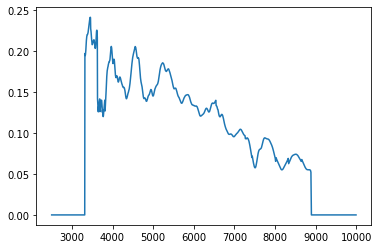

In [104]:
# compare against meanspec
s = readsav("/home/welterde/mess/2021/12/SESNtemple/MeanSpec/meanspIc/AllSpectraPerSN/meanspecIc_-10.sav")
dwbin = s.wlog[1:1024]-s.wlog[0:1023] 
dwbin = np.append(dwbin[0], dwbin) # array of bin sizes
fnoflat = (s.fmean+1)*s.smean # flux per log lambda bin
fnoflat_perA = fnoflat/dwbin # flux per angstrom
plt.plot(s.wlog,fnoflat_perA)


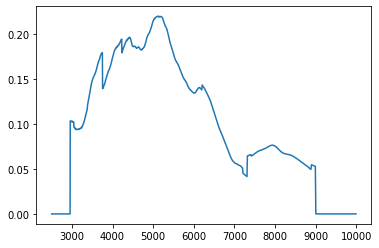

In [106]:
# compare against meanspec
s = readsav("/home/welterde/mess/2021/12/SESNtemple/MeanSpec/meanspIcBL/AllSpectraPerSN/meanspecIcBL_-10_ft.sav")
dwbin = s.wlog[1:1024]-s.wlog[0:1023] 
dwbin = np.append(dwbin[0], dwbin) # array of bin sizes
fnoflat = (s.fmean+1)*s.smean # flux per log lambda bin
fnoflat_perA = fnoflat/dwbin # flux per angstrom
plt.plot(s.wlog,fnoflat_perA)


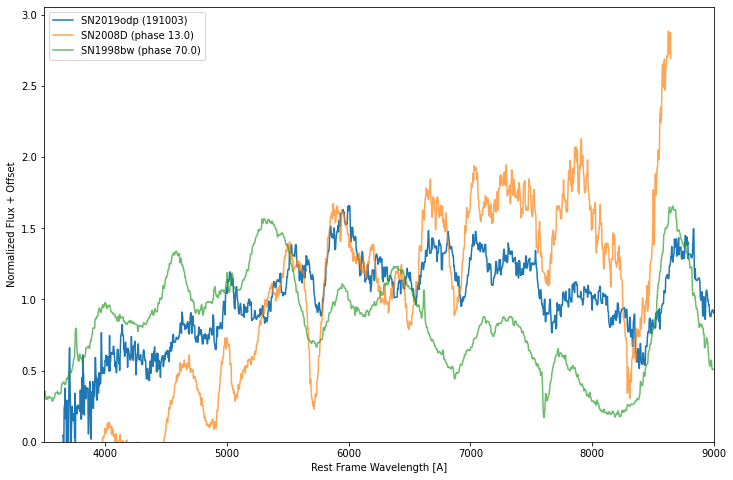

In [80]:
def plotr(wave, flux, label, fudge=1.0, alpha=1.0, smooth=3, offset=0):
    wave_idx = np.logical_and(wave > 4000, wave < 7000)
    mean_flux = np.nanmean(flux[wave_idx])
    smooth_flux = signal.medfilt(flux, smooth)
    plt.plot(wave, smooth_flux/mean_flux*fudge+offset, label=label, alpha=alpha)

plt.figure(figsize=(12,8))
plotr(tgt_spec7['wavelength'], tgt_spec7['flux'], label='SN2019odp (191003)')
idx = 33
phase = sn2008d_specs[idx]['time'] - 54492
plotr(sn2008d_specs[idx]['wave'], sn2008d_specs[idx]['flux'], offset=-0.5, label='SN2008D (phase %.1f)' % phase, fudge=1.3, alpha=0.7)
idx = 23
phase = sn1998bw[idx]['time'] - 50946
plotr(sn1998bw[idx]['wave'], sn1998bw[idx]['flux'], offset=0, label='SN1998bw (phase %.1f)' % phase, fudge=1.0, alpha=0.7)
idx = 0
phase = ptf13bvn[idx]['time'] - 56475
#plotr(ptf13bvn[idx]['wave'], ptf13bvn[idx]['flux'], label='PTF13bvn (phase %.1f)' % phase, fudge=1.0, alpha=0.4)


plt.legend()
#plt.axvline(4804)
#plt.axvline(6436)
plt.xlim((3500,9000))
plt.ylim((0))
plt.xlabel('Rest Frame Wavelength [A]')
plt.ylabel('Normalized Flux + Offset')
plt.savefig('2021-04-20-late1003-2008D-1998bw-comparison-match3.png')